$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1-10)^2 + (x_2+2)^2$. 

$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



Write your answer here: 

**1.ANSWER:** \\
$f(\mathbf{x})=f(x_1,x_2)= (x_1-10)^2 + (x_2+2)^2$ \\
$\hspace{4cm}=\ x_{1}^2 - 2*x_{1}*10 \ +  \ 10^2\ + \ x_{2}^2 \ + \ 2*2*x_{2} + \ 4$ \\
$\hspace{4cm}=\ (x_{1}^2 \ + \ x_{2}^2)\ + \ (- 2*x_{1}*10 \   \ + \ 2*2*x_{2}+ \ 10^2\ + \ 4)$ \\
$  $ \\
$\hspace{4cm}= \ \begin{bmatrix}x_{1} & x_{2}
\end{bmatrix}\ \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\begin{bmatrix}x_{1}\\x_{2} \end{bmatrix} + 2\begin{bmatrix}-10 & 2\end{bmatrix}\begin{bmatrix}
x_{1} \\ x_{2}\end{bmatrix} + 104$ \\
$  $ \\
$\hspace{4cm}=\ \mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$  \\
$ where ,\ \mathbf{x} = \begin{bmatrix}x_{1} \\ x_{2}
\end{bmatrix}\\
\hspace{1.5cm} \mathbf{A} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \ , \ \ \mathbf{b} = \begin{bmatrix}-10 \\ 2\end{bmatrix}\  \ , \ c = \ 104 $


**2. QUESTION :**


$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

**Write your answer here:** \\
$ \ Let ,\\
 g(\alpha) = f(\mathbf{x} - \alpha \nabla f(\mathbf{x})) $

 $ \  g^{'}(\alpha) = (-\nabla f(\mathbf{x})^{T}) (f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$
 
   $= (-\nabla f(\mathbf{x})^{T}) (2A(\mathbf{x} - \alpha \nabla f(\mathbf{x})+2b)$

   $= -2 [-\nabla f(\mathbf{x})^{T}AX-\alpha\nabla f(\mathbf{x})^{T}A\nabla f(\mathbf{x})+\nabla f(\mathbf{x})^{T}b]$

   $Now \ for \ extreme \ values \ (i.e. minima \ or \ maxima)$ \\
   $ we \ must \ have \ $
    $ \ g^{'}(\alpha) = 0$


$=> \alpha\nabla f(\mathbf{x})^{T}A\nabla f(\mathbf{x}) = \nabla f(\mathbf{x})^{T}(Ax+b)$

$=> \alpha(\nabla f(\mathbf{x})^{T}A\nabla f(\mathbf{x})) = (\nabla f(\mathbf{x})^{T}\nabla f(\mathbf{x}))/2$

$=> \alpha = \ (1/2) [(\nabla f(\mathbf{x})^{T}\nabla f(\mathbf{x})) / (\nabla f(\mathbf{x})^{T}A\nabla f(\mathbf{x}))]$ \\
$ \  \ $ \\
$This \ is \ the \ required \ solution.$


We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [87]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/1.19/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [88]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]-10)**2 + (x[1]+2)**2


In [89]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]-10),2*(x[1]+2)])

In [90]:
#Complete the module to compute the steplength
def compute_steplength(x): #add appropriate arguments to the function 
  #Complete the code 
  A = np.identity(2)
  gr = evalg(x)
  gr_t = np.matrix.transpose(gr)
  step_length = np.matmul(gr_t, gr)/(2*np.matmul(np.matmul(gr_t, A), gr))
  return step_length

In [91]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, k


In [92]:
my_start_x = np.array([0,0])  
tol_list = [10**(-j) for j in range(1,13)]
iterations_list = []
for my_tol in tol_list:
  opt_x, k = find_minimizer(my_start_x, my_tol)
  iterations_list.append(k)
  print('for tolerance = ',my_tol,', iter:',k)


for tolerance =  0.1 , iter: 1
for tolerance =  0.01 , iter: 1
for tolerance =  0.001 , iter: 1
for tolerance =  0.0001 , iter: 1
for tolerance =  1e-05 , iter: 1
for tolerance =  1e-06 , iter: 1
for tolerance =  1e-07 , iter: 1
for tolerance =  1e-08 , iter: 1
for tolerance =  1e-09 , iter: 1
for tolerance =  1e-10 , iter: 1
for tolerance =  1e-11 , iter: 1
for tolerance =  1e-12 , iter: 1


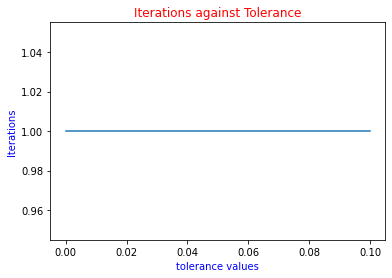

In [93]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(width,height))
plt.plot(tol_list, iterations_list)
plt.xlabel('tolerance values',color='b')
plt.ylabel('Iterations',color='b')
plt.title('Iterations against Tolerance',color='r')
plt.show()

**Comments :** \\
**1.Here it is obvious from the above graph that the Iterations for each value of tolerance remains constant whereas  in the Exerxise 1 for constant  step length the number of Iterations  for increasing values of tolerance decreases.** \\
**2.And this so because we are using exact line search for finding the minima.**

${\Large\text{Do not forget to rename the file before submission.}}$